<a href="https://colab.research.google.com/github/AfsanaBrishty/Machine-Learning-and-Deep-Learning-with-Python/blob/main/Decision_Tree_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Github Link:
https://github.com/AfsanaBrishty/Machine-Learning-and-Deep-Learning-with-Python/blob/main/Decision_Tree_and_Random_Forest.ipynb

In [62]:
import pandas as pd
df = pd.read_csv("JSVulnerabilityDataSet-1.0.csv")
df.head()

,name,longname,path,full_repo_path,line,column,endline,endcolumn,CC,CCL,CCO,CI,CLC,CLLC,McCC,NL,NLE,CD,CLOC,DLOC,TCD,TCLOC,LLOC,LOC,NOS,NUMPAR,TLLOC,TLOC,TNOS,HOR_D,HOR_T,HON_D,HON_T,HLEN,HVOC,HDIFF,HVOL,HEFF,HBUGS,HTIME,CYCL,PARAMS,CYCL_DENS,Vuln
0,initFileServer,initializers.initFileServer.initFileServer,initializers/initFileServer.js,https://github.com/actionhero/actionhero/blob/...,4,21,128,1,0.0,0,0,0,0.0,0,3,1,1,0.000000,0,0,0.008621,1,18,25,10,2,115,125,83,7,37,14,41,78,21,10.250000,342.600759,3511.657780,0.114200,195.092099,3,2,30.0,1
1,api.sendFile,initializers.initFileServer.initFileServer.sen...,initializers/initFileServer.js,https://github.com/actionhero/actionhero/blob/...,15,16,40,2,0.0,0,0,0,0.0,0,11,3,3,0.041667,1,0,0.041667,1,23,26,22,3,23,26,22,16,74,32,86,160,48,21.500000,893.594000,19212.271002,0.297865,1067.348389,9,3,37.5,1
2,<anonymous>.followFileToServe,initializers.initFileServer.initFileServer.fol...,initializers/initFileServer.js,https://github.com/actionhero/actionhero/blob/...,42,36,65,2,0.0,0,0,0,0.0,0,1,0,0,0.000000,0,0,0.000000,0,4,4,1,4,24,24,15,3,4,7,9,13,10,1.928571,43.185065,83.285483,0.014395,4.626971,1,4,100.0,1
3,<anonymous>.sendFile,initializers.initFileServer.initFileServer.sen...,initializers/initFileServer.js,https://github.com/actionhero/actionhero/blob/...,67,27,110,2,0.0,0,0,0,0.0,0,1,0,0,0.000000,0,0,0.000000,0,4,4,1,4,44,44,27,3,4,7,9,13,10,1.928571,43.185065,83.285483,0.014395,4.626971,1,4,100.0,0
4,<anonymous>.sendFileNotFound,initializers.initFileServer.initFileServer.sen...,initializers/initFileServer.js,https://github.com/actionhero/actionhero/blob/...,112,35,125,2,0.0,0,0,0,0.0,0,3,2,2,0.000000,0,0,0.000000,0,14,14,9,3,14,14,9,10,33,27,47,80,37,8.703704,416.756269,3627.323084,0.138919,201.517949,3,3,30.0,0


Decision Tree:

In [63]:
inputs = df.drop(['name','longname','path','full_repo_path','Vuln'],axis='columns')
target = df['Vuln']

In [32]:
inputs

,line,column,endline,endcolumn,CC,CCL,CCO,CI,CLC,CLLC,McCC,NL,NLE,CD,CLOC,DLOC,TCD,TCLOC,LLOC,LOC,NOS,NUMPAR,TLLOC,TLOC,TNOS,HOR_D,HOR_T,HON_D,HON_T,HLEN,HVOC,HDIFF,HVOL,HEFF,HBUGS,HTIME,CYCL,PARAMS,CYCL_DENS
0,4,21,128,1,0.0,0,0,0,0.0,0,3,1,1,0.000000,0,0,0.008621,1,18,25,10,2,115,125,83,7,37,14,41,78,21,10.250000,342.600759,3511.657780,0.114200,195.092099,3,2,30.000000
1,15,16,40,2,0.0,0,0,0,0.0,0,11,3,3,0.041667,1,0,0.041667,1,23,26,22,3,23,26,22,16,74,32,86,160,48,21.500000,893.594000,19212.271002,0.297865,1067.348389,9,3,37.500000
2,42,36,65,2,0.0,0,0,0,0.0,0,1,0,0,0.000000,0,0,0.000000,0,4,4,1,4,24,24,15,3,4,7,9,13,10,1.928571,43.185065,83.285483,0.014395,4.626971,1,4,100.000000
3,67,27,110,2,0.0,0,0,0,0.0,0,1,0,0,0.000000,0,0,0.000000,0,4,4,1,4,44,44,27,3,4,7,9,13,10,1.928571,43.185065,83.285483,0.014395,4.626971,1,4,100.000000
4,112,35,125,2,0.0,0,0,0,0.0,0,3,2,2,0.000000,0,0,0.000000,0,14,14,9,3,14,14,9,10,33,27,47,80,37,8.703704,416.756269,3627.323084,0.138919,201.517949,3,3,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12120,108,28,187,9,0.0,0,0,0,0.0,0,2,0,0,0.000000,0,0,0.137931,8,5,7,2,2,50,80,31,7,10,12,17,27,19,4.958333,114.694043,568.691296,0.038231,31.593961,2,2,66.666667
12121,188,8,191,9,0.0,0,0,0,0.0,0,1,0,0,0.250000,1,0,0.250000,1,3,4,1,0,3,4,1,3,4,3,3,7,6,1.500000,18.094738,27.142106,0.006032,1.507895,1,0,100.000000
12122,112,86,186,13,0.0,0,0,0,0.0,0,11,2,2,0.135135,5,0,0.145455,8,32,48,18,1,47,75,29,15,74,40,79,153,55,14.812500,884.548036,13102.367786,0.294849,727.909321,8,1,40.000000
12123,132,135,139,21,0.0,0,0,0,0.0,0,2,1,1,0.000000,0,0,0.000000,0,6,8,3,1,6,8,3,5,7,4,6,13,9,3.750000,41.209025,154.533844,0.013736,8.585214,2,1,66.666667


In [33]:
target

0        1
1        1
2        1
3        0
4        0
        ..
12120    0
12121    0
12122    0
12123    0
12124    0
Name: Vuln, Length: 12125, dtype: int64

In [34]:
from sklearn.preprocessing import MinMaxScaler 

In [35]:
scaling = MinMaxScaler()

In [36]:
inputs_n = scaling.fit_transform(inputs)
inputs_n

array([[2.84198560e-04, 6.45696891e-04, 1.19969771e-02, ...,
        1.66666667e-02, 1.53846154e-01, 3.33333333e-02],
       [1.32625995e-03, 4.91959536e-04, 3.68411109e-03, ...,
        6.66666667e-02, 2.30769231e-01, 4.16666667e-02],
       [3.88404699e-03, 1.10690896e-03, 6.04572076e-03, ...,
        0.00000000e+00, 3.07692308e-01, 1.11111111e-01],
       ...,
       [1.05153467e-02, 2.64428251e-03, 1.74759116e-02, ...,
        5.83333333e-02, 7.69230769e-02, 4.44444444e-02],
       [1.24100038e-02, 4.15090859e-03, 1.30360854e-02, ...,
        8.33333333e-03, 7.69230769e-02, 7.40740741e-02],
       [1.53467222e-02, 2.92100975e-03, 1.73814472e-02, ...,
        2.50000000e-02, 7.69230769e-02, 5.55555556e-02]])

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(inputs_n,target,test_size=0.3)

In [42]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
model.score(X_train,Y_train)

0.9988217273477082

In [44]:
model.score(X_test,Y_test)

0.936778449697636

In [48]:
Y_predicted = model.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix , classification_report

In [57]:
cm = confusion_matrix(Y_test, Y_predicted)
cm

array([[3053,  111],
       [ 119,  355]])

Text(69.0, 0.5, 'Truth')

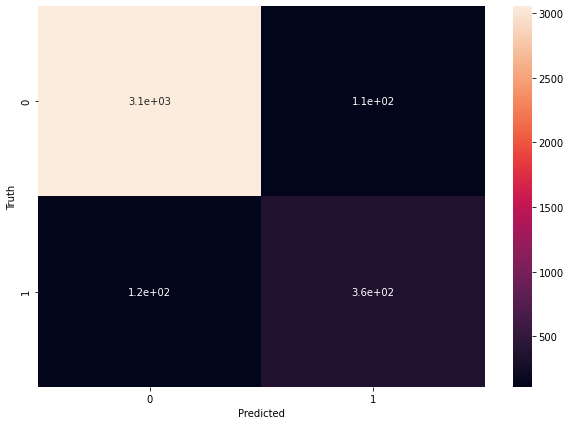

In [58]:
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3164
           1       0.76      0.75      0.76       474

    accuracy                           0.94      3638
   macro avg       0.86      0.86      0.86      3638
weighted avg       0.94      0.94      0.94      3638



Ignoring Line, column, endline, endcolumn


In [72]:
inputs = df.drop(['name','longname','path','full_repo_path','line','column','endline','endcolumn','Vuln'],axis='columns')
target = df['Vuln']

In [73]:
inputs

,CC,CCL,CCO,CI,CLC,CLLC,McCC,NL,NLE,CD,CLOC,DLOC,TCD,TCLOC,LLOC,LOC,NOS,NUMPAR,TLLOC,TLOC,TNOS,HOR_D,HOR_T,HON_D,HON_T,HLEN,HVOC,HDIFF,HVOL,HEFF,HBUGS,HTIME,CYCL,PARAMS,CYCL_DENS
0,0.0,0,0,0,0.0,0,3,1,1,0.000000,0,0,0.008621,1,18,25,10,2,115,125,83,7,37,14,41,78,21,10.250000,342.600759,3511.657780,0.114200,195.092099,3,2,30.000000
1,0.0,0,0,0,0.0,0,11,3,3,0.041667,1,0,0.041667,1,23,26,22,3,23,26,22,16,74,32,86,160,48,21.500000,893.594000,19212.271002,0.297865,1067.348389,9,3,37.500000
2,0.0,0,0,0,0.0,0,1,0,0,0.000000,0,0,0.000000,0,4,4,1,4,24,24,15,3,4,7,9,13,10,1.928571,43.185065,83.285483,0.014395,4.626971,1,4,100.000000
3,0.0,0,0,0,0.0,0,1,0,0,0.000000,0,0,0.000000,0,4,4,1,4,44,44,27,3,4,7,9,13,10,1.928571,43.185065,83.285483,0.014395,4.626971,1,4,100.000000
4,0.0,0,0,0,0.0,0,3,2,2,0.000000,0,0,0.000000,0,14,14,9,3,14,14,9,10,33,27,47,80,37,8.703704,416.756269,3627.323084,0.138919,201.517949,3,3,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12120,0.0,0,0,0,0.0,0,2,0,0,0.000000,0,0,0.137931,8,5,7,2,2,50,80,31,7,10,12,17,27,19,4.958333,114.694043,568.691296,0.038231,31.593961,2,2,66.666667
12121,0.0,0,0,0,0.0,0,1,0,0,0.250000,1,0,0.250000,1,3,4,1,0,3,4,1,3,4,3,3,7,6,1.500000,18.094738,27.142106,0.006032,1.507895,1,0,100.000000
12122,0.0,0,0,0,0.0,0,11,2,2,0.135135,5,0,0.145455,8,32,48,18,1,47,75,29,15,74,40,79,153,55,14.812500,884.548036,13102.367786,0.294849,727.909321,8,1,40.000000
12123,0.0,0,0,0,0.0,0,2,1,1,0.000000,0,0,0.000000,0,6,8,3,1,6,8,3,5,7,4,6,13,9,3.750000,41.209025,154.533844,0.013736,8.585214,2,1,66.666667


In [74]:
target

0        1
1        1
2        1
3        0
4        0
        ..
12120    0
12121    0
12122    0
12123    0
12124    0
Name: Vuln, Length: 12125, dtype: int64

In [75]:
from sklearn.preprocessing import MinMaxScaler 

In [76]:
scaling = MinMaxScaler()

In [77]:
inputs_n = scaling.fit_transform(inputs)
inputs_n

array([[0.        , 0.        , 0.        , ..., 0.01666667, 0.15384615,
        0.03333333],
       [0.        , 0.        , 0.        , ..., 0.06666667, 0.23076923,
        0.04166667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.30769231,
        0.11111111],
       ...,
       [0.        , 0.        , 0.        , ..., 0.05833333, 0.07692308,
        0.04444444],
       [0.        , 0.        , 0.        , ..., 0.00833333, 0.07692308,
        0.07407407],
       [0.        , 0.        , 0.        , ..., 0.025     , 0.07692308,
        0.05555556]])

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(inputs_n,target,test_size=0.3)

In [79]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [80]:
model.score(X_train,Y_train)

0.9872746553552492

In [81]:
model.score(X_test,Y_test)

0.9246838922484881

In [82]:
Y_predicted = model.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix , classification_report

In [84]:
cm = confusion_matrix(Y_test, Y_predicted)
cm

array([[3068,  146],
       [ 128,  296]])

Text(69.0, 0.5, 'Truth')

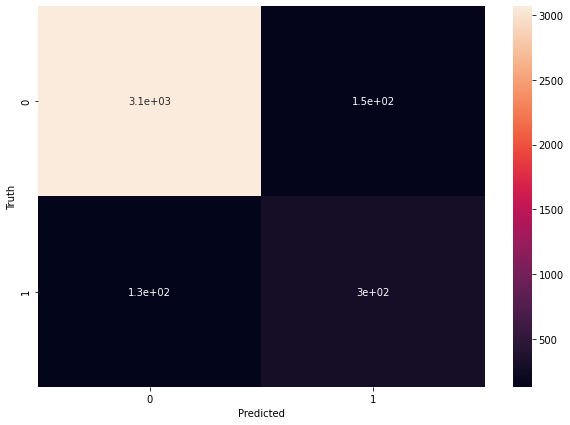

In [85]:
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [86]:
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3214
           1       0.67      0.70      0.68       424

    accuracy                           0.92      3638
   macro avg       0.81      0.83      0.82      3638
weighted avg       0.93      0.92      0.93      3638

